In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def air_pollution_level(value):
    if value == value and value <= 50: #exclude NaN
        return "good"
    elif 51 <= value <= 100:
        return "moderate"
    elif 101 <= value <= 150:
        return "unhealthy for sensitive groups"
    elif 151 <= value <= 200:
        return "unhealthy"
    elif 201 <= value <= 300:
        return "very unhealthy"
    elif value >= 301:
        return "hazardous"
    else: 
        return "no data"

In [3]:
def modify_dataset(frames, city, file):
    df_city = pd.read_csv(file)
    df_city['city'] = city
    df_city['date'] = pd.to_datetime(df_city['date'])
    df_city.sort_values(by='date', ascending=False, inplace=True)
    df_city.drop(columns=[' o3', ' no2', ' so2', ' co'], errors='ignore', inplace=True)
    df_city.rename(columns={' pm10':'pm10', ' pm25':'pm25'}, errors='ignore', inplace=True)
    df_city.replace(' ', np.nan, inplace=True)
    if 'pm10' in df_city.columns :
        df_city['pm10'] = pd.to_numeric(df_city['pm10'], downcast='float')
        df_city['pm10_pollution_level'] = df_city['pm10'].map(air_pollution_level)
    if 'pm25' in df_city.columns :
        df_city['pm25'] = pd.to_numeric(df_city['pm25'], downcast='float')
        df_city['pm25_pollution_level'] = df_city['pm25'].map(air_pollution_level)
    df_city = df_city.reindex(sorted(df_city.columns), axis=1)
    frames.append(df_city)

In [4]:
cities = {"munich":"munich-air-quality.csv", "hannover":"hannover-air-quality.csv", "berlin":"berlin-air-quality.csv", 
          "dresden":"dresden-bergstraße,-germany-air-quality.csv", "frankfurt":"frankfurt-schwanheim,-germany-air-quality.csv",
          "kiel":"kiel-bahnhofstr.-verk., schleswig-holstein, germany-air-quality.csv", "potsdam":"potsdam-zentrum,-germany-air-quality.csv",
          "hamburg":"sternschanze,-hamburg, germany-air-quality.csv", "stuttgart":"stuttgart-bad-cannstatt, germany-air-quality.csv"}
frames = []
for city, file in cities.items() :
    modify_dataset(frames, city, file)

df = pd.concat(frames)
df.set_index('date', inplace=True)
df.head()

,city,pm10,pm10_pollution_level,pm25,pm25_pollution_level
date,,,,,
2024-01-01,munich,NaN,no data,109.0,unhealthy for sensitive groups
2023-12-31,munich,113.0,unhealthy for sensitive groups,37.0,good
2023-12-30,munich,15.0,good,32.0,good
2023-12-29,munich,16.0,good,31.0,good
2023-12-28,munich,15.0,good,31.0,good


In [5]:
df['city'].value_counts()

city
hamburg      3403
stuttgart    3401
dresden      3342
munich       3329
hannover     3233
berlin       3200
potsdam      2923
kiel         2090
frankfurt    1913
Name: count, dtype: int64

In [8]:
#pip install openpyxl
df.to_excel('cities.xlsx')

city
berlin       Axes(0.125,0.2;0.775x0.68)
dresden      Axes(0.125,0.2;0.775x0.68)
frankfurt    Axes(0.125,0.2;0.775x0.68)
hamburg      Axes(0.125,0.2;0.775x0.68)
hannover     Axes(0.125,0.2;0.775x0.68)
kiel         Axes(0.125,0.2;0.775x0.68)
munich       Axes(0.125,0.2;0.775x0.68)
potsdam      Axes(0.125,0.2;0.775x0.68)
stuttgart    Axes(0.125,0.2;0.775x0.68)
Name: pm10, dtype: object

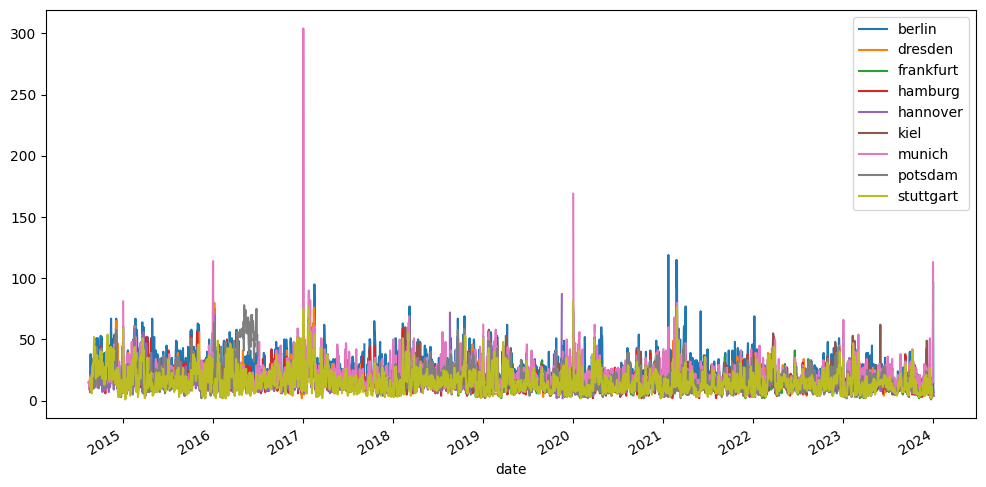

In [24]:
df.groupby('city')['pm10'].plot(legend=True, figsize=(12, 6))

In [10]:
df.groupby(['city', 'pm10_pollution_level']).size().unstack(fill_value=0)

pm10_pollution_level,good,hazardous,moderate,no data,unhealthy,unhealthy for sensitive groups
city,,,,,,
berlin,3051,0,131,15,0,3
dresden,2976,0,25,341,0,0
frankfurt,1899,0,2,12,0,0
hamburg,3355,0,19,29,0,0
hannover,3181,0,20,32,0,0
kiel,1994,0,15,81,0,0
munich,3269,1,47,8,1,3
potsdam,2829,0,76,18,0,0
stuttgart,3357,0,24,20,0,0


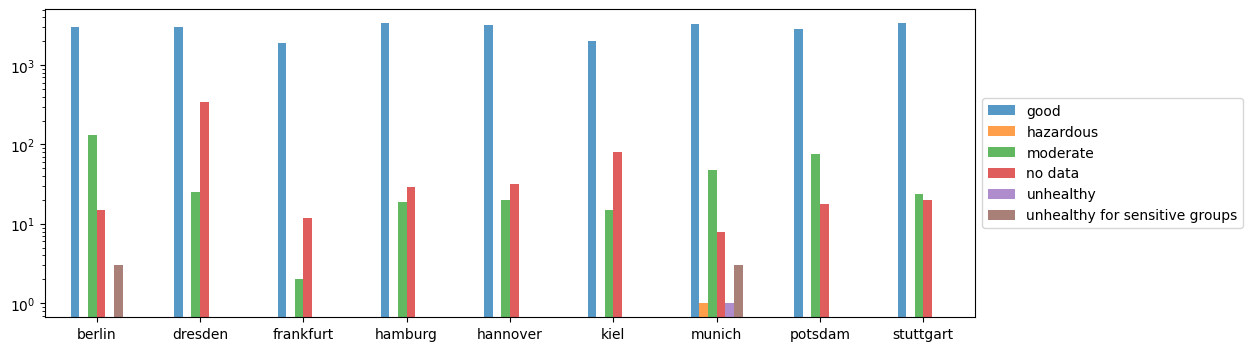

In [25]:
df.groupby(['city', 'pm10_pollution_level']).size().unstack().plot(kind="bar", xlabel='', alpha=0.75, rot=0, logy=True, figsize=(12, 4)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

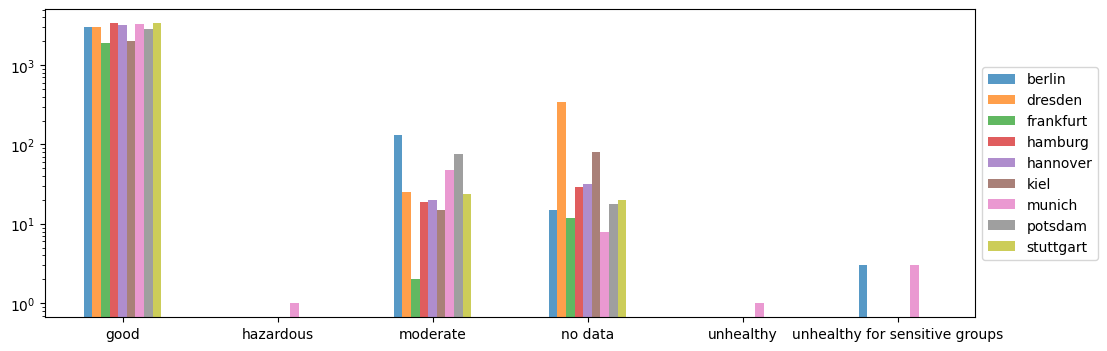

In [12]:
df.pivot_table(index='pm10_pollution_level', columns='city', aggfunc='size').plot(kind="bar", xlabel='', alpha=0.75, rot=0, logy=True, figsize=(12, 4)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

pm10    Axes(0.125,0.11;0.775x0.77)
dtype: object

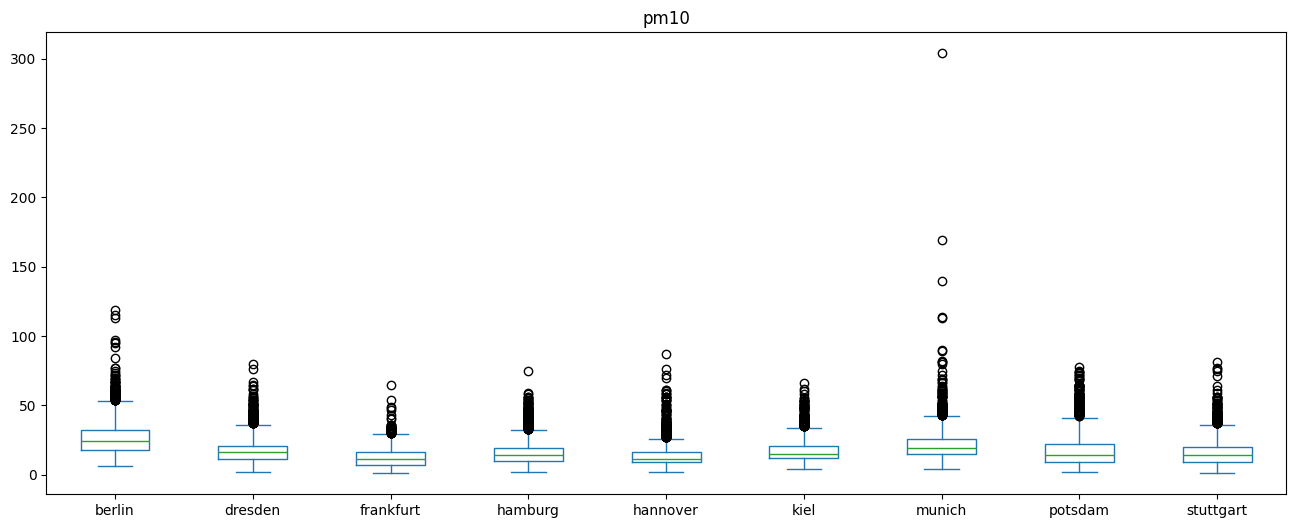

In [21]:
df.plot(kind='box', column=['pm10'], by='city', figsize=(16, 6))

pm25    Axes(0.125,0.11;0.775x0.77)
dtype: object

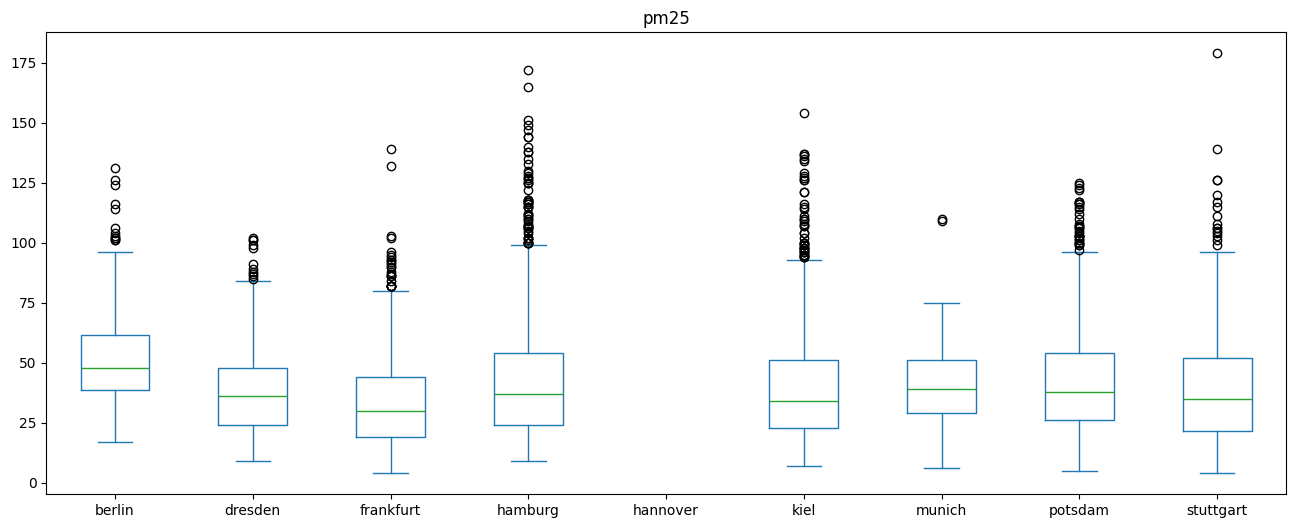

In [22]:
df.plot(kind='box', column=['pm25'], by='city', figsize=(16, 6))

In [14]:
df_copy = pd.concat(frames)
filt = df_copy['city'] == 'munich'
munich = df_copy[filt]
munich.head()

,city,date,pm10,pm10_pollution_level,pm25,pm25_pollution_level
0,munich,2024-01-01,NaN,no data,109.0,unhealthy for sensitive groups
91,munich,2023-12-31,113.0,unhealthy for sensitive groups,37.0,good
90,munich,2023-12-30,15.0,good,32.0,good
89,munich,2023-12-29,16.0,good,31.0,good
88,munich,2023-12-28,15.0,good,31.0,good


<Axes: xlabel='Year', ylabel='Month'>

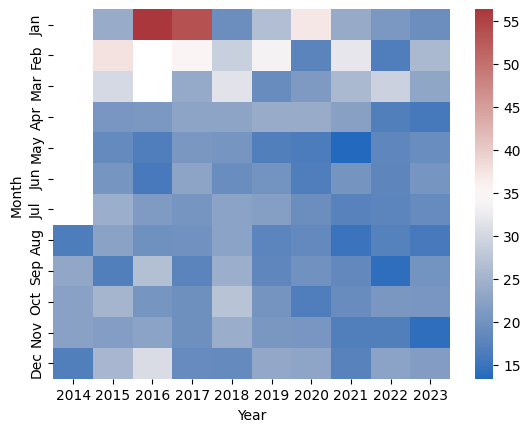

In [15]:
pd.options.mode.chained_assignment = None
munich["Year"] = munich["date"].apply(lambda x: x.year)
munich["Month"] = munich["date"].apply(lambda x: x.strftime("%b"))
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
pt = munich.pivot_table(index="Month",columns="Year",values="pm10", aggfunc="mean").reindex(months)
#fig, ax = plt.subplots(figsize=(10, 4)) 
sns.heatmap(pt, annot=False, cmap="vlag")
#plt.savefig('heatmap_munich_pm10.png')

<Axes: xlabel='Week', ylabel='Year'>

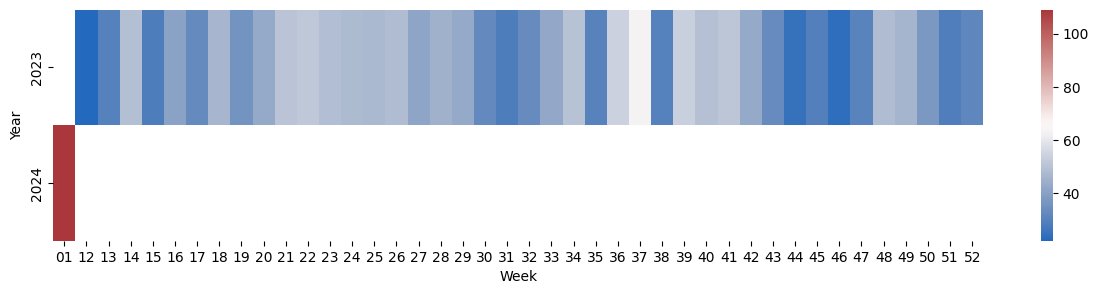

In [16]:
munich["Week"] = munich["date"].apply(lambda x: x.strftime("%W"))
pt2 = munich.pivot_table(index="Year",columns="Week",values="pm25", aggfunc="mean")
fig, ax = plt.subplots(figsize=(15, 3)) 
sns.heatmap(pt2, annot=False, cmap="vlag")

<Axes: xlabel='Day', ylabel='Year'>

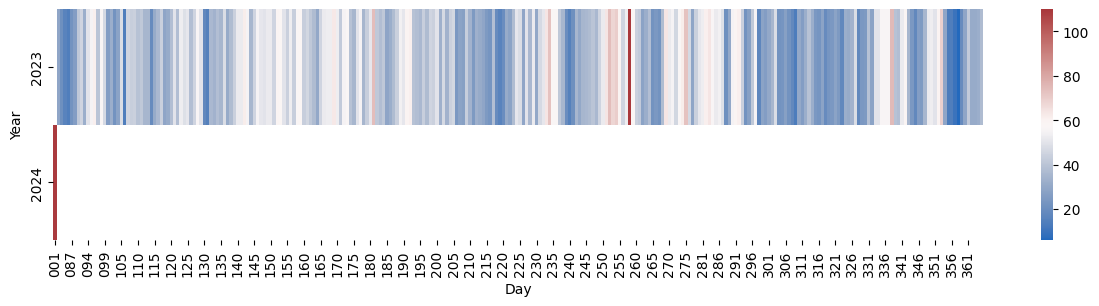

In [17]:
munich["Day"] = munich["date"].apply(lambda x: x.strftime("%j"))
pt3 = munich.pivot_table(index="Year",columns="Day",values="pm25", aggfunc="mean")
fig, ax = plt.subplots(figsize=(15, 3)) 
sns.heatmap(pt3, annot=False, cmap="vlag")